In [1]:
import model
import numpy as np
from matplotlib import pyplot as plt

In [2]:
""" some additional functions for generating averaged plots """

def get_node_degrees(net, size):
    node_degrees = []
    times = []
    for i in range(size):
        k, t = net.get_degree_wrt_time(i)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def simulate(size, iterations, fitness):
    node_degrees = []
    times = []

    for i in range(iterations):
        network = model.network()
        network.set_fitness_from_data(fitness)
        network.generate_network(size, from_data=True)
        
        t, k = get_node_degrees(network, size)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def clone_shape(arr):
    res = []
    for x in arr:
        res.append(np.zeros_like(x))
    return res

def get_means(arr):
    summ = clone_shape(arr[0])
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            for k in range(len(arr[i][j])):
                summ[j][k] += arr[i][j][k]

    means = [[value / len(arr) for value in subarr] for subarr in summ]

    return means

    

In [52]:
""" Basic run of the model on randomly generated fitness distr """

network = model.network()
network.set_fitness_distr('uniform')
size = 1000
G = network.generate_network(size)

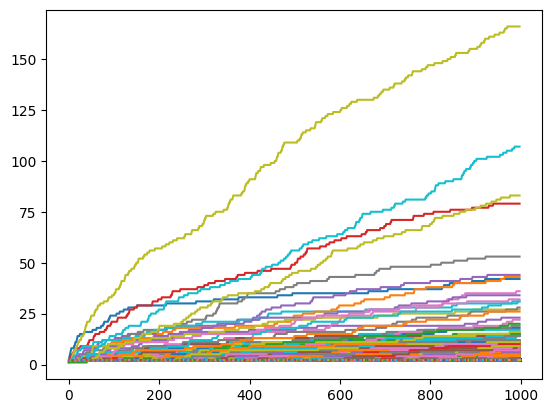

In [53]:
times, node_degrees = get_node_degrees(network, size)

for i in range(len(times)):
    plt.plot(times[i], node_degrees[i])

In [56]:
""" model run with a custom fitness distribution from data """

network = model.network()
size = 1000

#fitness_data = [1 for i in range(size)]

rng = np.random.default_rng(1234)
fitness_data = rng.random(size)
#fitness_data = rng.exponential(2.0, size)

network.generator.fitness_data = fitness_data

G = network.generate_network(size, from_data=True)

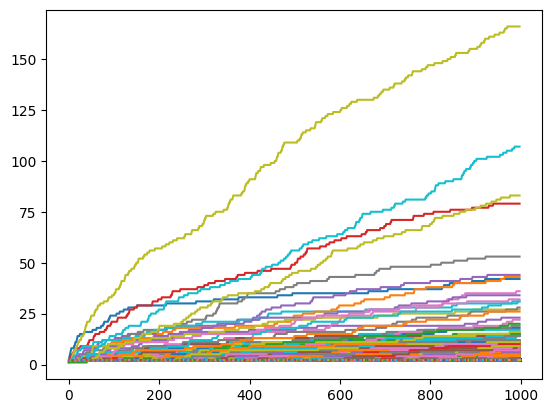

In [57]:
times, node_degrees = get_node_degrees(network, size)

for i in range(len(times)):
    plt.plot(times[i], node_degrees[i])

In [58]:
""" averaging 20 runs with 5000 time points each for exponential fitness distr"""

size = 5000
iterations = 20
rng = np.random.default_rng(1234)
fitness_data = rng.exponential(1.0,size)

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

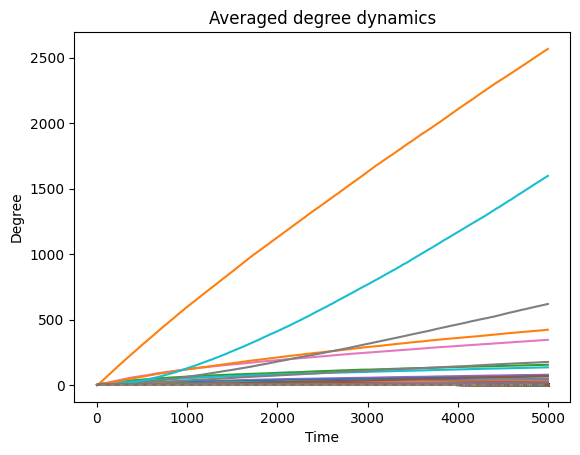

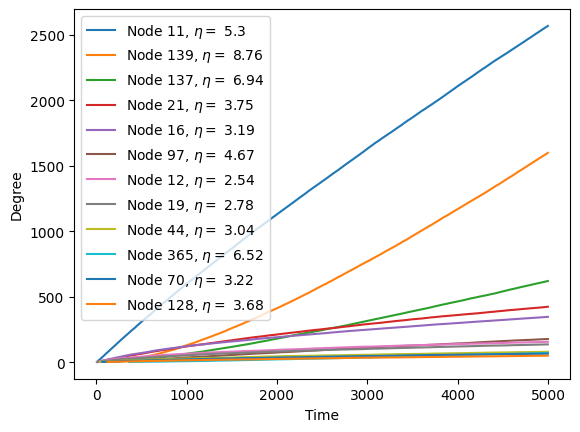

In [59]:
for i in range(len(mean_degrees)):
    plt.plot(times[0][i], mean_degrees[i])

plt.xlabel('Time')
plt.ylabel('Degree')
plt.title(f'Averaged degree dynamics')

# plotting only nodes with high degree
end_time_degrees = [mean_degrees[node][-1] for node in range(size)]
top_nodes = sorted(range(size), key=lambda x: end_time_degrees[x], reverse=True)[:12]

plt.figure()
for node in top_nodes:
    plt.plot(times[0][node], mean_degrees[node], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node],2)}' for node in top_nodes]

plt.legend(legend_labels)
plt.xlabel('Time')
plt.ylabel('Degree')
plt.show()

In [13]:
""" the same but for uniform distr """

size = 10000
iterations = 30
rng = np.random.default_rng(1234)
fitness_data = rng.random(size)

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

In [15]:
print(np.where(fitness_data < 0.3)[0][:50])
fitness_data[34]

[  3   5   6   9  17  18  20  24  28  29  34  36  38  41  48  49  60  64
  67  71  72  73  75  77  80  81  83  85  89  92  93  99 100 103 107 110
 112 114 118 121 123 125 126 134 135 138 142 145 146 148]


0.15347417112811557

Text(0, 0.5, 'Degree')

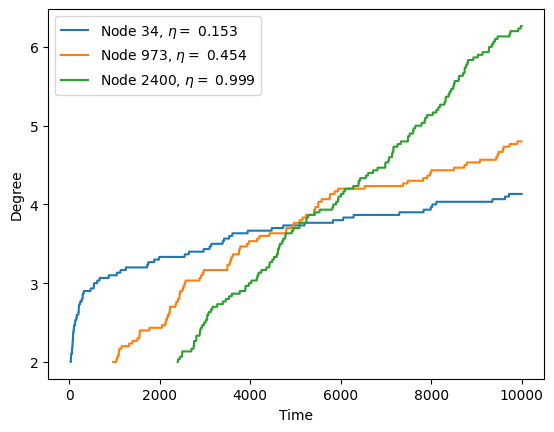

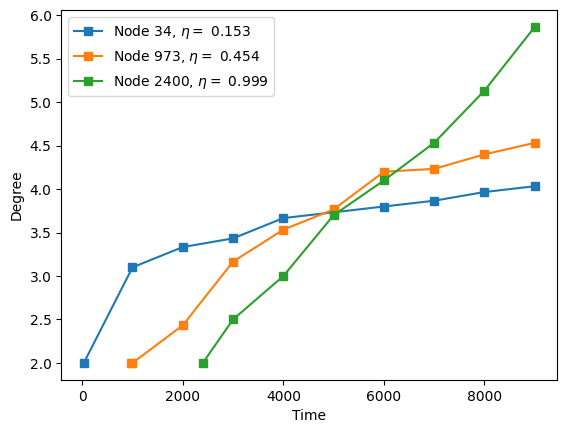

In [18]:

picked_nodes = [34, 973, 2400]

for node in picked_nodes:
    plt.plot(times[0][node], mean_degrees[node], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node],3)}' for node in picked_nodes]

plt.legend(legend_labels)
plt.xlabel('Time')
plt.ylabel('Degree')


plt.figure()
for node in picked_nodes:
    times_temp = [times[0][node][0]]
    degrees_temp = [mean_degrees[node][0]]
    for i in range(len(mean_degrees[node])):
        if times[0][node][i] % 1000 == 0:
            times_temp.append(times[0][node][i])
            degrees_temp.append(mean_degrees[node][i])         

    plt.plot(times_temp, degrees_temp,'-s', label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node],3)}' for node in picked_nodes]

plt.legend(legend_labels)
plt.xlabel('Time')
plt.ylabel('Degree')